# Optimizing the Python Code for Big Data 
Balancing Coding Complexity against Computational Complexity 
    
    AUTHOR: Dr. Roy Jafari 


# Chapter 2: Choosing the right data types 


## Challenge 4: string or datetime?

After going through this challenge you will be able to intelligibly choose between string and DateTime when both are possible and will be able to elucidate the reasons for your choice from experience.  
Let us get started. Answer the following questions or complete the following steps.
1.	Using pandas read the file *orders.csv*, and study the ensuing DataFrame. The following code gets this done.

In [1]:
import pandas as pd
order_df = pd.read_csv('orders.csv')
print(order_df)

           date  quantity
0    2021-06-26     385.0
1    2021-06-27     523.0
2    2021-06-28     536.0
3    2021-06-29     414.0
4    2021-06-30     433.0
..          ...       ...
277  2022-06-06      64.0
278  2022-06-19      20.0
279  2022-06-22      23.0
280  2022-06-24      34.0
281  2022-06-25      30.0

[282 rows x 2 columns]


2.	Run the following code to figure out the data type of the column `date` in `order_df`. What is its data type?

In [2]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      282 non-null    object 
 1   quantity  282 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.5+ KB


**Answer**: the data type of date is object. From experience we know, object here is string.

3.	The following code first changes the title of the column date into `date_str`. After that, the code uses `pd.to_datetime()` to create the new column `date_dt` that contains the same information but its data type is *DateTime*. Run the following code and study its output, specifically note the *Dtype* of `date_str` and `date_dt`. 

In [3]:
order_df  = order_df.rename(columns = {'date': 'date_str'})
order_df['date_dt'] = pd.to_datetime(order_df.date_str)
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date_str  282 non-null    object        
 1   quantity  282 non-null    float64       
 2   date_dt   282 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.7+ KB


**Answer**: the *Dtype* of `date_str` is object (string), and the *Dtype* of `date_dt` is datetime64.

4.	The following code will print out the exact number of bytes of memory that the columns `date_str` and `date_dt` use. Is there any difference in the amount of memory that the date information takes up when encoded using string or DateTime?

In [4]:
order_df.memory_usage()

Index        128
date_str    2256
quantity    2256
date_dt     2256
dtype: int64

**Answer**: No. They are using the same amout of memeory.

5.	The following code draws a line plot of the column `quantity`. Run the code and investigate the ensuing plot. There is a logical error in the line plot. Investigate to see if you can figure it out.

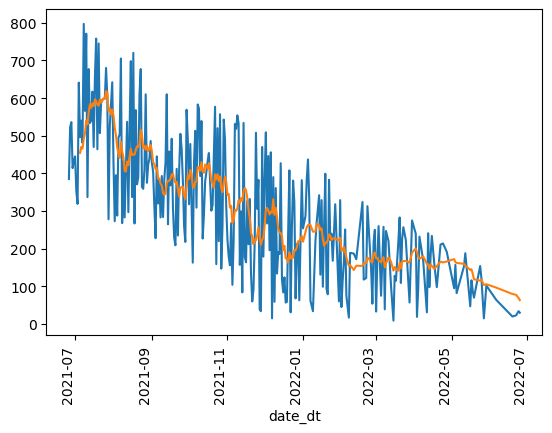

In [5]:
import matplotlib.pyplot as plt
(order_df
 .set_index('date_dt')
 .quantity
 .plot())

(order_df
 .set_index('date_dt')
 .rolling(window=10)
 .quantity.mean()

 .plot())

plt.xticks(rotation=90)
plt.show()

**Answer**: We will see the hint in the next step, before answering. 

6.	Running the following code will give you a hint to be able to answer the previous question. Carefully read the dates and their consecutive orders. Do you see anything out of ordinary? What do you think is causing the problem?

In [6]:
print(order_df[:20])
print(order_df[-20:])

      date_str  quantity    date_dt
0   2021-06-26     385.0 2021-06-26
1   2021-06-27     523.0 2021-06-27
2   2021-06-28     536.0 2021-06-28
3   2021-06-29     414.0 2021-06-29
4   2021-06-30     433.0 2021-06-30
5   2021-07-01     445.0 2021-07-01
6   2021-07-02     353.0 2021-07-02
7   2021-07-03     319.0 2021-07-03
8   2021-07-04     641.0 2021-07-04
9   2021-07-05     496.0 2021-07-05
10  2021-07-06     540.0 2021-07-06
11  2021-07-07     481.0 2021-07-07
12  2021-07-08     797.0 2021-07-08
13  2021-07-09     566.0 2021-07-09
14  2021-07-10     771.0 2021-07-10
15  2021-07-11     337.0 2021-07-11
16  2021-07-12     677.0 2021-07-12
17  2021-07-13     534.0 2021-07-13
18  2021-07-14     540.0 2021-07-14
19  2021-07-15     617.0 2021-07-15
       date_str  quantity    date_dt
262  2022-04-24     214.0 2022-04-24
263  2022-04-27     192.0 2022-04-27
264  2022-05-03      95.0 2022-05-03
265  2022-05-04     157.0 2022-05-04
266  2022-05-05      82.0 2022-05-05
267  2022-05-11     15

**Answer**: We see that toward the end of `order_df`, we start seeing missing dates. The reason is that since in those data the quantity has been zero, the relevant rows are not recorded. Because we are not taking these zeros into account the plots we drew under step 5 is incorrect; specifically, the trendline towards the end of the plot is biased.

7.	The problem is that there are some dates whose value of quantity must have been zero, and because of that those dates are not included in `order_df`. To fix our analysis we need to add those rows to `order_df`. In this step, we will be fixing the problem using date_str. In the next step, we will do the same thing using `date_dt`. In the step after that, we will compare the two approaches.

This is going to be a long step with multiple sub-steps.

First, we get a copy of `order_df` and only keep `date_str` and `quantity` as columns. The name of the new DataFrame will be `order_str_df`. Run the following code to get this done.

In [7]:
order_str_df = order_df.reset_index()[['date_str','quantity']].copy()
print(order_str_df)

       date_str  quantity
0    2021-06-26     385.0
1    2021-06-27     523.0
2    2021-06-28     536.0
3    2021-06-29     414.0
4    2021-06-30     433.0
..          ...       ...
277  2022-06-06      64.0
278  2022-06-19      20.0
279  2022-06-22      23.0
280  2022-06-24      34.0
281  2022-06-25      30.0

[282 rows x 2 columns]


Next, we will create the function `get_next_date()` that given any date will output its next date. The reason that we need such a function is that our calendar does not follow a completely uniform pattern and the number of days in each month is different. This has been captured in the following code using the dictionary `end_months`. The function `get_next_date()` leverages `end_months` to work. Run the following code to generate this function. 


In [8]:
end_months = {'01':31, '02':28, '03':31,
              '04':30, '05':31, '06':30,
              '07':31, '08':31, '09':30,
              '10':31, '11':30, '12':31}

def get_next_date(date):
    
    (year,month,day) = date.split('-')
    max_day = end_months[month]
    
    if max_day > int(day):
        new_date = f'0{int(day)+1}'[-2:]
        return f'{year}-{month}-{new_date}'
    else:
        if int(month) < 12:
            new_month = f'0{int(month)+1}'[-2:]
            return f'{year}-{new_month}-01'
        else:
            return f'{int(year)+1}-01-01'
    if max_day > int(day):
        new_date = f'0{int(day)+1}'[-2:]
        return f'{year}-{month}-{new_date}'
    else:
        if int(month) < 12:
            new_month = f'0{int(month)+1}'[-2:]
            return f'{year}-{new_month}-01'
        else:
            return f'{int(year)+1}-01-01'

After creating the function, give it a try by running it for a few dates, for instance, run `get_next_date('2022-12-31')`.

In [11]:
get_next_date('2022-12-31')

'2023-01-01'

Next, we define another function; the function `dates_between()` is created to output the dates that are between two given dates. This function takes in two dates and outputs the dates of the days between the two input dates. The function `dates_between()` leverages the function `get_next_date()` to work. Run the following code that defines the function `dates_between()`.


In [13]:
def dates_between(date1,date2):
    if(date1==date2):
        return None
    else:
        output = []
        next_date = date1
        while get_next_date(next_date) != date2:
            next_date = get_next_date(next_date)
            output.append(next_date)
        return output

After creating the function, give it a try by running it for a few couples of dates, for instance, run `dates_between('2022-10-31','2022-11-05')`.


In [14]:
dates_between('2022-10-31','2022-11-05')

['2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04']

Now that we are armed with `dates_between()` function, we can run the following code that will identify the dates that are missing in `order_str_df`.

In [15]:
missing_dates = []
for i,row in order_str_df.iterrows():
    if i== 0:
        continue
    p_date = order_str_df.loc[i-1,'date_str']
    the_date = row.date_str
    missing_dates.extend(dates_between(p_date,the_date))
print(missing_dates)

['2021-12-30', '2022-01-02', '2022-01-08', '2022-01-10', '2022-01-13', '2022-01-26', '2022-01-28', '2022-01-29', '2022-02-06', '2022-02-09', '2022-02-10', '2022-02-12', '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-20', '2022-02-23', '2022-02-24', '2022-03-04', '2022-03-06', '2022-03-10', '2022-03-12', '2022-03-14', '2022-03-18', '2022-03-24', '2022-03-26', '2022-03-27', '2022-03-29', '2022-03-31', '2022-04-01', '2022-04-06', '2022-04-07', '2022-04-09', '2022-04-10', '2022-04-16', '2022-04-18', '2022-04-20', '2022-04-21', '2022-04-23', '2022-04-25', '2022-04-26', '2022-04-28', '2022-04-29', '2022-04-30', '2022-05-01', '2022-05-02', '2022-05-06', '2022-05-07', '2022-05-08', '2022-05-09', '2022-05-10', '2022-05-13', '2022-05-14', '2022-05-15', '2022-05-20', '2022-05-21', '2022-05-22', '2022-05-23', '2022-05-26', '2022-05-28', '2022-05-30', '2022-05-31', '2022-06-01', '2022-06-02', '2022-06-03', '2022-06-04', '2022-06-05', '2022-06-07', '2022-06-08', '2022-06-09', '2022

Next, we will use the list `missing_dates` to add the missing dates to `order_str_df`. The following code gets this done.


In [16]:
my_index = pd.Series(missing_dates,name='date_str')
to_be_adde_df = pd.DataFrame(
    0.0,
    index=my_index,
    columns = ['quantity'])
order_str_df = pd.concat(
        [order_str_df,
         to_be_adde_df.reset_index()]
)
order_str_df = (order_str_df
    .sort_values('date_str')
    .reset_index(drop=True)
)
print(order_str_df)

       date_str  quantity
0    2021-06-26     385.0
1    2021-06-27     523.0
2    2021-06-28     536.0
3    2021-06-29     414.0
4    2021-06-30     433.0
..          ...       ...
360  2022-06-21       0.0
361  2022-06-22      23.0
362  2022-06-23       0.0
363  2022-06-24      34.0
364  2022-06-25      30.0

[365 rows x 2 columns]


After running the preceding code, `order_str_df` will not have the missing-dates issue of `order_df`. You can check this by running the following code and studying its output.

In [18]:
print(order_str_df[:20])
print(order_str_df[-20:])

      date_str  quantity
0   2021-06-26     385.0
1   2021-06-27     523.0
2   2021-06-28     536.0
3   2021-06-29     414.0
4   2021-06-30     433.0
5   2021-07-01     445.0
6   2021-07-02     353.0
7   2021-07-03     319.0
8   2021-07-04     641.0
9   2021-07-05     496.0
10  2021-07-06     540.0
11  2021-07-07     481.0
12  2021-07-08     797.0
13  2021-07-09     566.0
14  2021-07-10     771.0
15  2021-07-11     337.0
16  2021-07-12     677.0
17  2021-07-13     534.0
18  2021-07-14     540.0
19  2021-07-15     617.0
       date_str  quantity
345  2022-06-06      64.0
346  2022-06-07       0.0
347  2022-06-08       0.0
348  2022-06-09       0.0
349  2022-06-10       0.0
350  2022-06-11       0.0
351  2022-06-12       0.0
352  2022-06-13       0.0
353  2022-06-14       0.0
354  2022-06-15       0.0
355  2022-06-16       0.0
356  2022-06-17       0.0
357  2022-06-18       0.0
358  2022-06-19      20.0
359  2022-06-20       0.0
360  2022-06-21       0.0
361  2022-06-22      23.0
362  20

Lastly, we can use `order_str_df` to create the correct version of the plot that we drew under step 5. Run the following code and compare the ensuing plots with the plot from step 5.

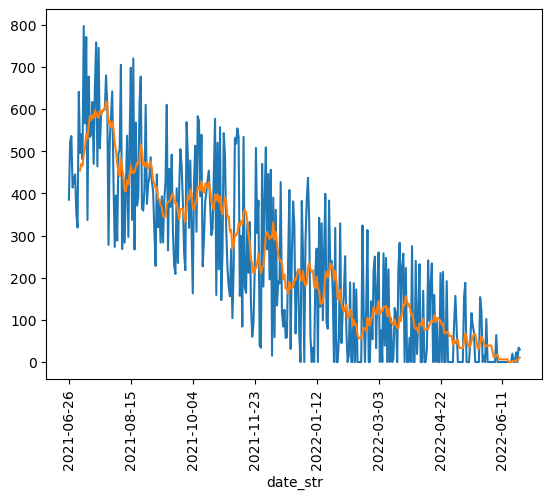

In [19]:
(order_str_df
 .set_index('date_str')
 .quantity.plot()
)
(order_str_df
 .set_index('date_str')
 .rolling(window=10)
 .quantity.mean()
 .plot()
)
plt.xticks(rotation=90)
plt.show()


After running all of the codes, write out the tasks that we had to perform to remedy the issue we found in step 5.

**Answer**: These are the tasks we did in this step.

- figure out the information regarding the calendar month and include them in the dictionary `end_months`.
- define the function `get_next_date()` by leveraging the dictionary `end_months`
- define the function `dates_between()` by leveraging the function `get_next_date()`
- finding the missing dates by leveraging the function `dates_between()`
- adding new rows to order_str_df 
- redoing the plot


8.	In this step, we will redo what we did in step 7; we will remedy the issue we found in step 5; however, we will do it this time using `date_dt`. In other words, instead of working with string to manipulate dates, we will use the data type DateTime. This is going to be another long step with multiple sub-steps.vFirst, we get a copy of `order_df` and only keep `date_dt` and `quantity` as columns. The name of the new DataFrame will be `order_dt_df`. Run the following code to get this done.

In [20]:
order_dt_df = order_df.reset_index()[['date_dt','quantity']].copy()
print(order_dt_df)

       date_dt  quantity
0   2021-06-26     385.0
1   2021-06-27     523.0
2   2021-06-28     536.0
3   2021-06-29     414.0
4   2021-06-30     433.0
..         ...       ...
277 2022-06-06      64.0
278 2022-06-19      20.0
279 2022-06-22      23.0
280 2022-06-24      34.0
281 2022-06-25      30.0

[282 rows x 2 columns]


Next, we will find the first and last date we see on `order_dt_df`. The following code gets this done.

In [21]:
first_date = order_dt_df.date_dt.min()
last_date = order_dt_df.date_dt.max()
print(first_date,last_date)

2021-06-26 00:00:00 2022-06-25 00:00:00


Next, we will find the number of days between the `first_date` and `last_date`. The following code gets this done.

In [22]:
n_days = (last_date - first_date).days
print(n_days)

364


Next, we will create a list of all the dates between `first_date` and `last_date`. The following code takes advantage of the function `datetime.time_delta()` to easily get this done.

In [23]:
import datetime
all_dates = [
    first_date + datetime.timedelta(days=i) for i in range(n_days+1)
]
print(all_dates)

[Timestamp('2021-06-26 00:00:00'), Timestamp('2021-06-27 00:00:00'), Timestamp('2021-06-28 00:00:00'), Timestamp('2021-06-29 00:00:00'), Timestamp('2021-06-30 00:00:00'), Timestamp('2021-07-01 00:00:00'), Timestamp('2021-07-02 00:00:00'), Timestamp('2021-07-03 00:00:00'), Timestamp('2021-07-04 00:00:00'), Timestamp('2021-07-05 00:00:00'), Timestamp('2021-07-06 00:00:00'), Timestamp('2021-07-07 00:00:00'), Timestamp('2021-07-08 00:00:00'), Timestamp('2021-07-09 00:00:00'), Timestamp('2021-07-10 00:00:00'), Timestamp('2021-07-11 00:00:00'), Timestamp('2021-07-12 00:00:00'), Timestamp('2021-07-13 00:00:00'), Timestamp('2021-07-14 00:00:00'), Timestamp('2021-07-15 00:00:00'), Timestamp('2021-07-16 00:00:00'), Timestamp('2021-07-17 00:00:00'), Timestamp('2021-07-18 00:00:00'), Timestamp('2021-07-19 00:00:00'), Timestamp('2021-07-20 00:00:00'), Timestamp('2021-07-21 00:00:00'), Timestamp('2021-07-22 00:00:00'), Timestamp('2021-07-23 00:00:00'), Timestamp('2021-07-24 00:00:00'), Timestamp('20

Next, we will create `stage_df` which is a DataFrame with a row for all the dates in `all_dates`, and the column `quantity` with the value of zero.

In [24]:
stage_df = pd.DataFrame(0.0,
                        index = all_dates,
                        columns =['quantity'])
print(stage_df)

            quantity
2021-06-26       0.0
2021-06-27       0.0
2021-06-28       0.0
2021-06-29       0.0
2021-06-30       0.0
...              ...
2022-06-21       0.0
2022-06-22       0.0
2022-06-23       0.0
2022-06-24       0.0
2022-06-25       0.0

[365 rows x 1 columns]


Next, we will use the `.update()` function which is a property of each pandas DataFrame to update `stage_df` using `order_dt_df`. Once `stage_df` is updated, we no longer need the old `order_dt_df`, so we equate `stage_df` to `order_dt_df`. 


In [25]:
stage_df.update(order_dt_df.set_index('date_dt'))
order_dt_df = stage_df
print(order_dt_df)

            quantity
2021-06-26     385.0
2021-06-27     523.0
2021-06-28     536.0
2021-06-29     414.0
2021-06-30     433.0
...              ...
2022-06-21       0.0
2022-06-22      23.0
2022-06-23       0.0
2022-06-24      34.0
2022-06-25      30.0

[365 rows x 1 columns]


After running the preceding code, `order_dt_df` will not have the missing-dates issue of `order_df`. You can check this by running the following code and studying its output.

In [26]:
print(order_dt_df[:20])
print(order_dt_df[-20:])

            quantity
2021-06-26     385.0
2021-06-27     523.0
2021-06-28     536.0
2021-06-29     414.0
2021-06-30     433.0
2021-07-01     445.0
2021-07-02     353.0
2021-07-03     319.0
2021-07-04     641.0
2021-07-05     496.0
2021-07-06     540.0
2021-07-07     481.0
2021-07-08     797.0
2021-07-09     566.0
2021-07-10     771.0
2021-07-11     337.0
2021-07-12     677.0
2021-07-13     534.0
2021-07-14     540.0
2021-07-15     617.0
            quantity
2022-06-06      64.0
2022-06-07       0.0
2022-06-08       0.0
2022-06-09       0.0
2022-06-10       0.0
2022-06-11       0.0
2022-06-12       0.0
2022-06-13       0.0
2022-06-14       0.0
2022-06-15       0.0
2022-06-16       0.0
2022-06-17       0.0
2022-06-18       0.0
2022-06-19      20.0
2022-06-20       0.0
2022-06-21       0.0
2022-06-22      23.0
2022-06-23       0.0
2022-06-24      34.0
2022-06-25      30.0


Lastly, we can use `order_dt_df` to create the correct version of the plot that we drew under step 5. Run the following code and compare the ensuing plot with the plot from step 5.

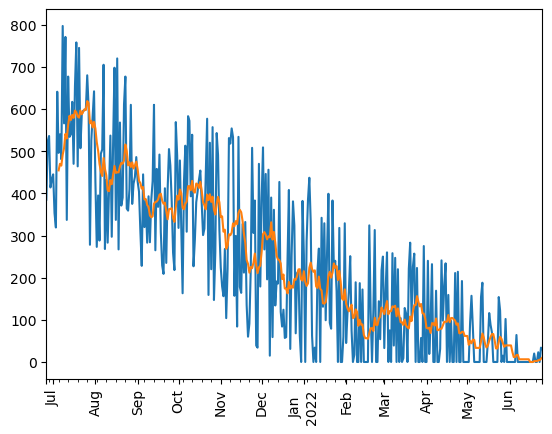

In [27]:
order_dt_df.quantity.plot()
(order_dt_df
 .rolling(window=10)
 .quantity.mean()
 .plot()
)
plt.xticks(rotation=90)
plt.show()

After running all of the codes, write out the tasks that we had to perform to remedy the issue we found in step 5.

**Answer**: These are the tasks we did in this step.

- find `first_date` and `last_date`
- find the `n_days` between `first_date` and `last_date`
- fill up `all_dates` with all the dates between `first_date` and `last_date`
- create `stage_df`
- update `stage_df` and replace `order_dt_df` with `stage_df`
- redoing the plot

9.	The plots that we created under steps 7 and 8 are both correct, but there is a difference between them. Compare them to find the difference. Which one is better? What’s causing the serendipitous improvement? 

**Answer**: The plot from step 8 is more presentable due to the xticks of its x-axis. You can see that pandas has automatically leveraged the index of order_dt_df whose data type is DateTime to create a better looking x-axis.

10.	Compare what we did in steps 7 and steps 8. In both steps, we were trying to remedy the missing-dates issue in `order_df`. In step 7, the date information was encoded in the data type string, and in step 8, they were encoded in DateTime. In which of the two steps did we have to create new functions? Which of the two steps would have been easier to develop in a real project?

**Answer**:
- **In which of the two steps did we have to create new functions?**: we had to create our own functions when we were working with strings. The functions are very rudimentary and could fail easily when the case study becomes more complex.

- **Which of the two steps would have been easier to develop in a real project?**: it is easier to work with DateTime. We didn't have to create our own functions and it is less likely that our code will run into errors.


11.	As an option to encode and manipulate date information compare string and DateTime using the following criterion: 1) RAM space, 2) CPU Performance, 3) run time, 4) coding time.  

**Answer**: 

- **1) RAM space**: they are identical.
- **2) CPU Performance**: we didn't study it in this challenge. Probably, they will be comparable, if we manage to create good functions to manipulate dates encoded as strings. Pay attention that is a big if.
- **3) run time**: we didn't study it in this challenge. Probably, they will be comparable, if we manage to create good functions to manipulate dates encoded as strings. Pay attention that is a big if.
- **4) coding time**: DateTime is prefered. We won't have to write our own functions.
